# S&P 500 COMPANIES ANALYSIS

## Import module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import requests
from bs4 import BeautifulSoup

import re
import time

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [3]:
page = requests.get(url)

In [4]:
page

<Response [200]>

In [5]:
soup = BeautifulSoup(page.text,'html.parser')

In [6]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of S&amp;P 500 companies - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feat

In [7]:
table = soup.find('table',{'class':'wikitable sortable'})

In [8]:
table

<table class="wikitable sortable" id="constituents">
<tbody><tr class="is-sticky">
<th><a href="/wiki/Ticker_symbol" title="Ticker symbol">Symbol</a>
</th>
<th>Security</th>
<th><a href="/wiki/Global_Industry_Classification_Standard" title="Global Industry Classification Standard">GICS</a> Sector</th>
<th>GICS Sub-Industry</th>
<th>Headquarters Location</th>
<th>Date added</th>
<th><a href="/wiki/Central_Index_Key" title="Central Index Key">CIK</a></th>
<th>Founded
</th></tr>
<tr>
<td><a class="external text" href="https://www.nyse.com/quote/XNYS:MMM" rel="nofollow">MMM</a>
</td>
<td><a href="/wiki/3M" title="3M">3M</a></td>
<td>Industrials</td>
<td>Industrial Conglomerates</td>
<td><a href="/wiki/Saint_Paul,_Minnesota" title="Saint Paul, Minnesota">Saint Paul, Minnesota</a></td>
<td>1957-03-04</td>
<td>0000066740</td>
<td>1902
</td></tr>
<tr>
<td><a class="external text" href="https://www.nyse.com/quote/XNYS:AOS" rel="nofollow">AOS</a>
</td>
<td><a href="/wiki/A._O._Smith" title="A. O

In [9]:
data = {
    'Ticker Symbol': [],
    'Name': [],
    'Sector': [],
    'Sub-Industry': [],
    'Headquarters': [],
    'Date Added': [],
    'CIK': [],
    'Founded': []
}

In [10]:
for row in table.find_all('tr')[1:]:
    columns = row.find_all('td')
    if len(columns) > 0:
        data['Ticker Symbol'].append(columns[0].text.strip())
        data['Name'].append(columns[1].text.strip())
        data['Sector'].append(columns[2].text.strip())
        data['Sub-Industry'].append(columns[3].text.strip())
        data['Headquarters'].append(columns[4].text.strip())
        data['Date Added'].append(columns[5].text.strip())
        data['CIK'].append(columns[6].text.strip())
        data['Founded'].append(columns[7].text.strip())

In [11]:
df = pd.DataFrame(data)

In [12]:
df

Ticker Symbol                  Name                  Sector  \
0             MMM                    3M             Industrials   
1             AOS           A. O. Smith             Industrials   
2             ABT                Abbott             Health Care   
3            ABBV                AbbVie             Health Care   
4             ACN             Accenture  Information Technology   
..            ...                   ...                     ...   
498           YUM           Yum! Brands  Consumer Discretionary   
499          ZBRA    Zebra Technologies  Information Technology   
500           ZBH         Zimmer Biomet             Health Care   
501          ZION  Zions Bancorporation              Financials   
502           ZTS                Zoetis             Health Care   

                           Sub-Industry             Headquarters  Date Added  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                         Biotechnology  North Chicago, Illinois  2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland  2011-07-06   
..                                  ...                      ...         ...   
498                         Restaurants     Louisville, Kentucky  1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois  2019-12-23   
500               Health Care Equipment          Warsaw, Indiana  2001-08-07   
501                      Regional Banks     Salt Lake City, Utah  2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey  2013-06-21   

            CIK      Founded  
0    0000066740         1902  
1    0000091142         1916  
2    0000001800         1888  
3    0001551152  2013 (1888)  
4    0001467373         1989  
..          ...          ...  
498  0001041061         1997  
499  0000877212         1969  
500  0001136869         1927  
501  0000109380         1873  
502  0001555280         1952  

[503 rows x 8 columns]

In [13]:
df.to_csv('S&P_output_file.csv', index=False)

In [14]:
df = pd.read_csv('S&P_output_file.csv')

In [15]:
#Basic information about the DataFrame
print("Number of features (columns):", df.shape)
print("Number of observations (rows):", df.shape[0])

Number of features (columns): (503, 8)
Number of observations (rows): 503


In [16]:
print("\nData types of each feature:")
print(df.dtypes)


Data types of each feature:
Ticker Symbol    object
Name             object
Sector           object
Sub-Industry     object
Headquarters     object
Date Added       object
CIK               int64
Founded          object
dtype: object


In [17]:
missing_values = df.isnull().sum()
# number of missing values for each feature
print("\nNumber of missing values for each feature:")
print(missing_values)


Number of missing values for each feature:
Ticker Symbol    0
Name             0
Sector           0
Sub-Industry     0
Headquarters     0
Date Added       0
CIK              0
Founded          0
dtype: int64


# Data Cleaning

### Finding the missing values

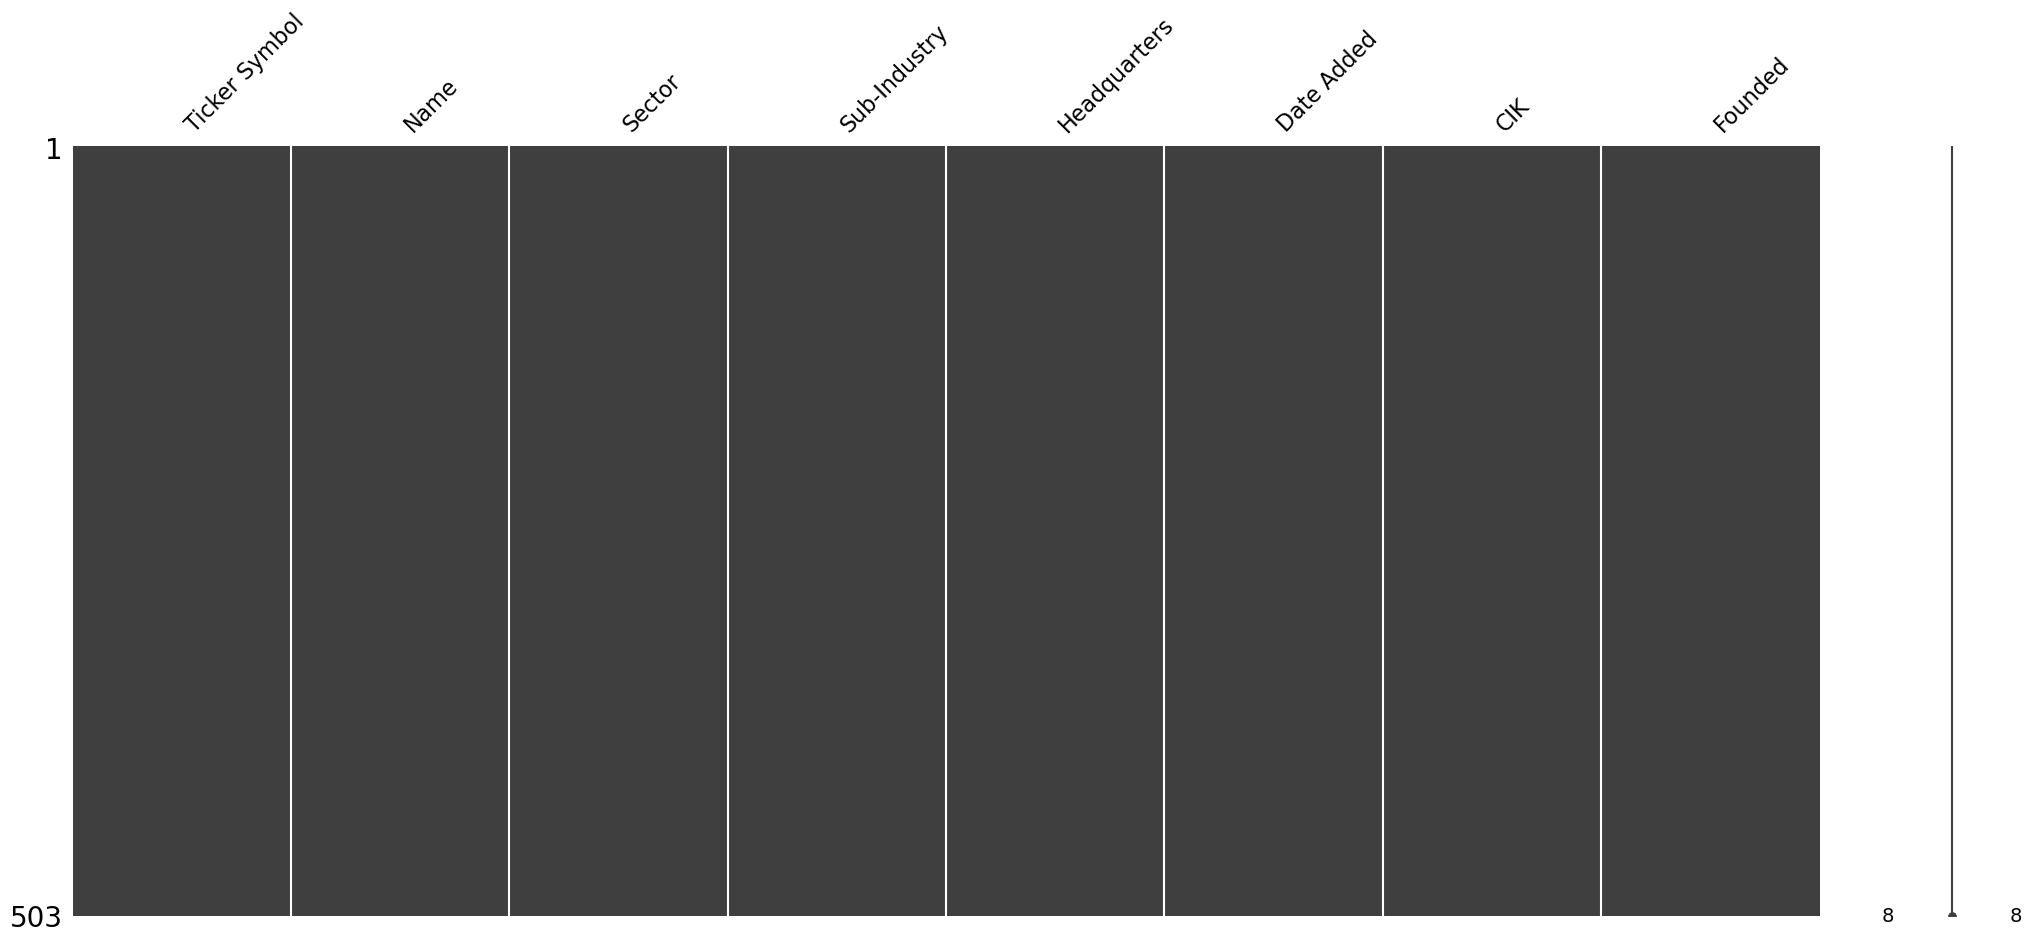

In [18]:
import missingno as msno

msno.matrix(df)
plt.show()

### Removing Special Characters,White spaces and Incorrect Headers

In [19]:
df.columns = [re.sub(r'\W+', '', col) for col in df.columns]

In [20]:
df

TickerSymbol                  Name                  Sector  \
0            MMM                    3M             Industrials   
1            AOS           A. O. Smith             Industrials   
2            ABT                Abbott             Health Care   
3           ABBV                AbbVie             Health Care   
4            ACN             Accenture  Information Technology   
..           ...                   ...                     ...   
498          YUM           Yum! Brands  Consumer Discretionary   
499         ZBRA    Zebra Technologies  Information Technology   
500          ZBH         Zimmer Biomet             Health Care   
501         ZION  Zions Bancorporation              Financials   
502          ZTS                Zoetis             Health Care   

                            SubIndustry             Headquarters   DateAdded  \
0              Industrial Conglomerates    Saint Paul, Minnesota  1957-03-04   
1                     Building Products     Milwaukee, Wisconsin  2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois  1957-03-04   
3                         Biotechnology  North Chicago, Illinois  2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland  2011-07-06   
..                                  ...                      ...         ...   
498                         Restaurants     Louisville, Kentucky  1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois  2019-12-23   
500               Health Care Equipment          Warsaw, Indiana  2001-08-07   
501                      Regional Banks     Salt Lake City, Utah  2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey  2013-06-21   

         CIK      Founded  
0      66740         1902  
1      91142         1916  
2       1800         1888  
3    1551152  2013 (1888)  
4    1467373         1989  
..       ...          ...  
498  1041061         1997  
499   877212         1969  
500  1136869         1927  
501   109380         1873  
502  1555280         1952  

[503 rows x 8 columns]

### Converting the Data Types

In [21]:
df['DateAdded'] = pd.to_datetime(df['DateAdded'],errors='coerce')

In [22]:
df['Founded'] = df['Founded'].str.extract('(\d+)', expand=False).astype(float)

In [23]:
df

TickerSymbol                  Name                  Sector  \
0            MMM                    3M             Industrials   
1            AOS           A. O. Smith             Industrials   
2            ABT                Abbott             Health Care   
3           ABBV                AbbVie             Health Care   
4            ACN             Accenture  Information Technology   
..           ...                   ...                     ...   
498          YUM           Yum! Brands  Consumer Discretionary   
499         ZBRA    Zebra Technologies  Information Technology   
500          ZBH         Zimmer Biomet             Health Care   
501         ZION  Zions Bancorporation              Financials   
502          ZTS                Zoetis             Health Care   

                            SubIndustry             Headquarters  DateAdded  \
0              Industrial Conglomerates    Saint Paul, Minnesota 1957-03-04   
1                     Building Products     Milwaukee, Wisconsin 2017-07-26   
2                 Health Care Equipment  North Chicago, Illinois 1957-03-04   
3                         Biotechnology  North Chicago, Illinois 2012-12-31   
4        IT Consulting & Other Services          Dublin, Ireland 2011-07-06   
..                                  ...                      ...        ...   
498                         Restaurants     Louisville, Kentucky 1997-10-06   
499  Electronic Equipment & Instruments   Lincolnshire, Illinois 2019-12-23   
500               Health Care Equipment          Warsaw, Indiana 2001-08-07   
501                      Regional Banks     Salt Lake City, Utah 2001-06-22   
502                     Pharmaceuticals   Parsippany, New Jersey 2013-06-21   

         CIK  Founded  
0      66740   1902.0  
1      91142   1916.0  
2       1800   1888.0  
3    1551152   2013.0  
4    1467373   1989.0  
..       ...      ...  
498  1041061   1997.0  
499   877212   1969.0  
500  1136869   1927.0  
501   109380   1873.0  
502  1555280   1952.0  

[503 rows x 8 columns]

In [24]:
print(df['Headquarters'].unique())

['Saint Paul, Minnesota' 'Milwaukee, Wisconsin' 'North Chicago, Illinois'
 'Dublin, Ireland' 'San Jose, California' 'Santa Clara, California'
 'Arlington, Virginia' 'Columbus, Georgia' 'Allentown, Pennsylvania'
 'San Francisco, California' 'Cambridge, Massachusetts'
 'Charlotte, North Carolina' 'Pasadena, California' 'Tempe, Arizona'
 'Madison, Wisconsin' 'Northbrook, Illinois' 'Mountain View, California'
 'Richmond, Virginia' 'Seattle, Washington'
 'Warmley, Bristol, United Kingdom' 'St. Louis, Missouri'
 'Fort Worth, Texas' 'Columbus, Ohio' 'New York City, New York'
 'Boston, Massachusetts' 'Camden, New Jersey' 'Minneapolis, Minnesota'
 'Berwyn, Pennsylvania' 'Thousand Oaks, California'
 'Wallingford, Connecticut' 'Wilmington, Massachusetts'
 'Canonsburg, Pennsylvania' 'London, UK' 'Houston, Texas'
 'Cupertino, California' 'Hamilton, Bermuda' 'Chicago, Illinois'
 'Rolling Meadows, Illinois' 'Atlanta, Georgia' 'Dallas, Texas'
 'Roseland, New Jersey' 'Memphis, Tennessee' 'Mentor, Ohio'

### Splitting columns

In [25]:
df[['City', 'State']] = df['Headquarters'].str.rsplit(', ', n=1, expand=True)
print(df[['City', 'State']])

               City       State
0        Saint Paul   Minnesota
1         Milwaukee   Wisconsin
2     North Chicago    Illinois
3     North Chicago    Illinois
4            Dublin     Ireland
..              ...         ...
498      Louisville    Kentucky
499    Lincolnshire    Illinois
500          Warsaw     Indiana
501  Salt Lake City        Utah
502      Parsippany  New Jersey

[503 rows x 2 columns]


In [26]:
df.head(25)

TickerSymbol                             Name                  Sector  \
0           MMM                               3M             Industrials   
1           AOS                      A. O. Smith             Industrials   
2           ABT                           Abbott             Health Care   
3          ABBV                           AbbVie             Health Care   
4           ACN                        Accenture  Information Technology   
5          ADBE                       Adobe Inc.  Information Technology   
6           AMD           Advanced Micro Devices  Information Technology   
7           AES                  AES Corporation               Utilities   
8           AFL                            Aflac              Financials   
9             A             Agilent Technologies             Health Care   
10          APD       Air Products and Chemicals               Materials   
11         ABNB                           Airbnb  Consumer Discretionary   
12         AKAM                           Akamai  Information Technology   
13          ALB            Albemarle Corporation               Materials   
14          ARE  Alexandria Real Estate Equities             Real Estate   
15         ALGN                 Align Technology             Health Care   
16         ALLE                         Allegion             Industrials   
17          LNT                   Alliant Energy               Utilities   
18          ALL                         Allstate              Financials   
19        GOOGL          Alphabet Inc. (Class A)  Communication Services   
20         GOOG          Alphabet Inc. (Class C)  Communication Services   
21           MO                           Altria        Consumer Staples   
22         AMZN                           Amazon  Consumer Discretionary   
23         AMCR                            Amcor               Materials   
24          AEE                           Ameren               Utilities   

                                       SubIndustry  \
0                         Industrial Conglomerates   
1                                Building Products   
2                            Health Care Equipment   
3                                    Biotechnology   
4                   IT Consulting & Other Services   
5                             Application Software   
6                                   Semiconductors   
7     Independent Power Producers & Energy Traders   
8                          Life & Health Insurance   
9                   Life Sciences Tools & Services   
10                                Industrial Gases   
11                  Hotels, Resorts & Cruise Lines   
12              Internet Services & Infrastructure   
13                             Specialty Chemicals   
14                                    Office REITs   
15                            Health Care Supplies   
16                               Building Products   
17                              Electric Utilities   
18                   Property & Casualty Insurance   
19                    Interactive Media & Services   
20                    Interactive Media & Services   
21                                         Tobacco   
22                                Broadline Retail   
23  Paper & Plastic Packaging Products & Materials   
24                                 Multi-Utilities   

                        Headquarters  DateAdded      CIK  Founded  \
0              Saint Paul, Minnesota 1957-03-04    66740   1902.0   
1               Milwaukee, Wisconsin 2017-07-26    91142   1916.0   
2            North Chicago, Illinois 1957-03-04     1800   1888.0   
3            North Chicago, Illinois 2012-12-31  1551152   2013.0   
4                    Dublin, Ireland 2011-07-06  1467373   1989.0   
5               San Jose, California 1997-05-05   796343   1982.0   
6            Santa Clara, California 2017-03-20     2488   1969.0   
7                Arlington, Virginia 1998-10-02   874761   1981.0   


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TickerSymbol  503 non-null    object        
 1   Name          503 non-null    object        
 2   Sector        503 non-null    object        
 3   SubIndustry   503 non-null    object        
 4   Headquarters  503 non-null    object        
 5   DateAdded     503 non-null    datetime64[ns]
 6   CIK           503 non-null    int64         
 7   Founded       503 non-null    float64       
 8   City          503 non-null    object        
 9   State         503 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 39.4+ KB


In [28]:
df.describe(include='all')

TickerSymbol Name       Sector            SubIndustry  \
count           503  503          503                    503   
unique          503  503           11                    126   
top             MMM   3M  Industrials  Health Care Equipment   
freq              1    1           78                     18   
mean            NaN  NaN          NaN                    NaN   
min             NaN  NaN          NaN                    NaN   
25%             NaN  NaN          NaN                    NaN   
50%             NaN  NaN          NaN                    NaN   
75%             NaN  NaN          NaN                    NaN   
max             NaN  NaN          NaN                    NaN   
std             NaN  NaN          NaN                    NaN   

                   Headquarters                      DateAdded           CIK  \
count                       503                            503  5.030000e+02   
unique                      250                            NaN           NaN   
top     New York City, New York                            NaN           NaN   
freq                         40                            NaN           NaN   
mean                        NaN  2000-12-13 18:33:38.290258432  8.035969e+05   
min                         NaN            1957-03-04 00:00:00  1.800000e+03   
25%                         NaN            1991-11-10 12:00:00  9.911900e+04   
50%                         NaN            2007-09-26 00:00:00  8.954210e+05   
75%                         NaN            2016-09-15 12:00:00  1.150618e+06   
max                         NaN            2023-12-18 00:00:00  1.996862e+06   
std                         NaN                            NaN  5.604796e+05   

            Founded           City       State  
count    503.000000            503         503  
unique          NaN            239          46  
top             NaN  New York City  California  
freq            NaN             40          69  
mean    1954.860835            NaN         NaN  
min     1784.000000            NaN         NaN  
25%     1919.000000            NaN         NaN  
50%     1970.000000            NaN         NaN  
75%     1994.000000            NaN         NaN  
max     2023.000000            NaN         NaN  
std       49.026261            NaN         NaN

## EDA and Data Visualization


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

## Univariate Analysis

### Histogram 

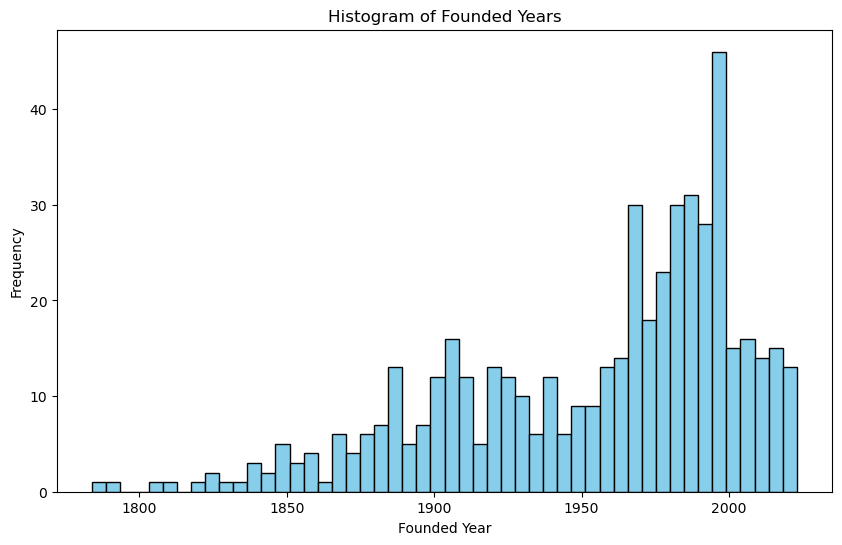

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(df['Founded'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Founded Years')
plt.xlabel('Founded Year')
plt.ylabel('Frequency')
plt.show()

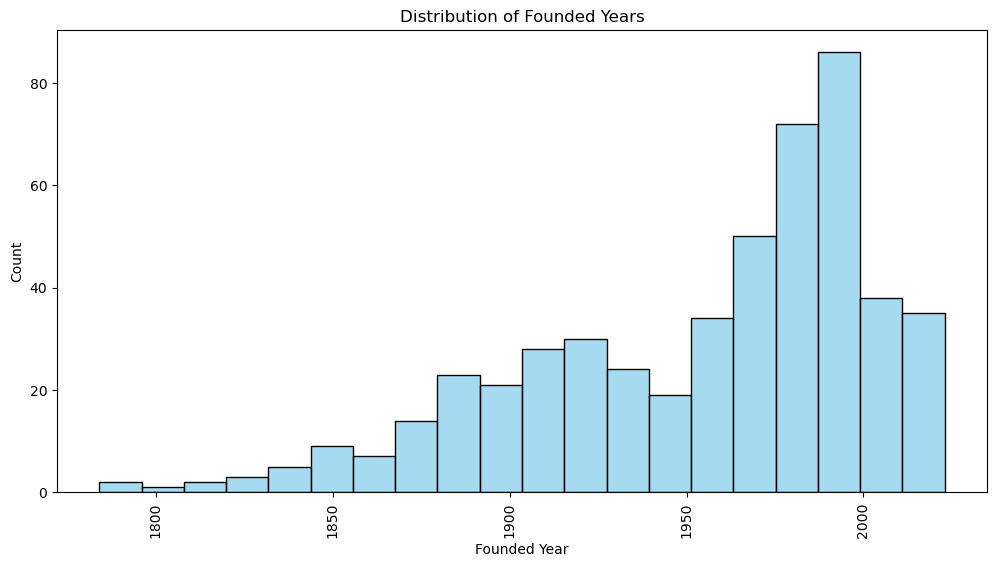

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Founded'], bins=20, color='skyblue')
plt.title('Distribution of Founded Years')
plt.xlabel('Founded Year')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

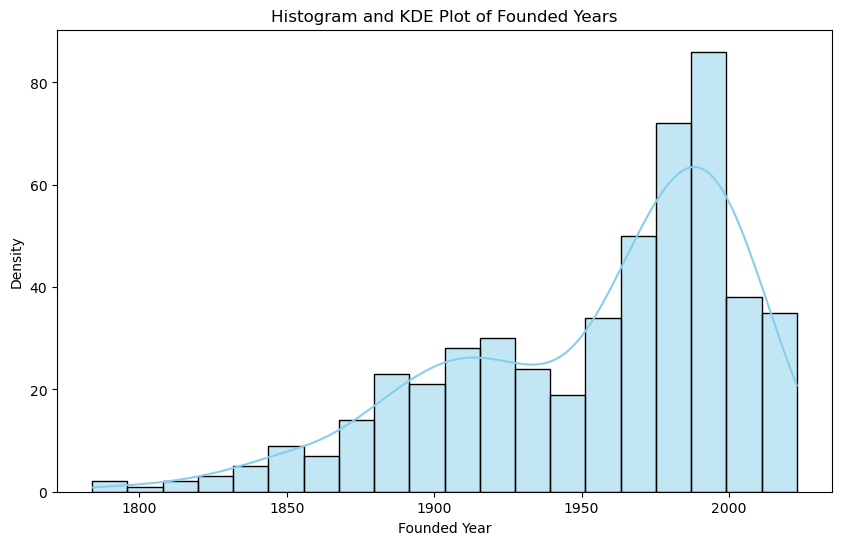

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Founded'], bins=20, kde=True, color='skyblue')
plt.title('Histogram and KDE Plot of Founded Years')
plt.xlabel('Founded Year')
plt.ylabel('Density')
plt.show()

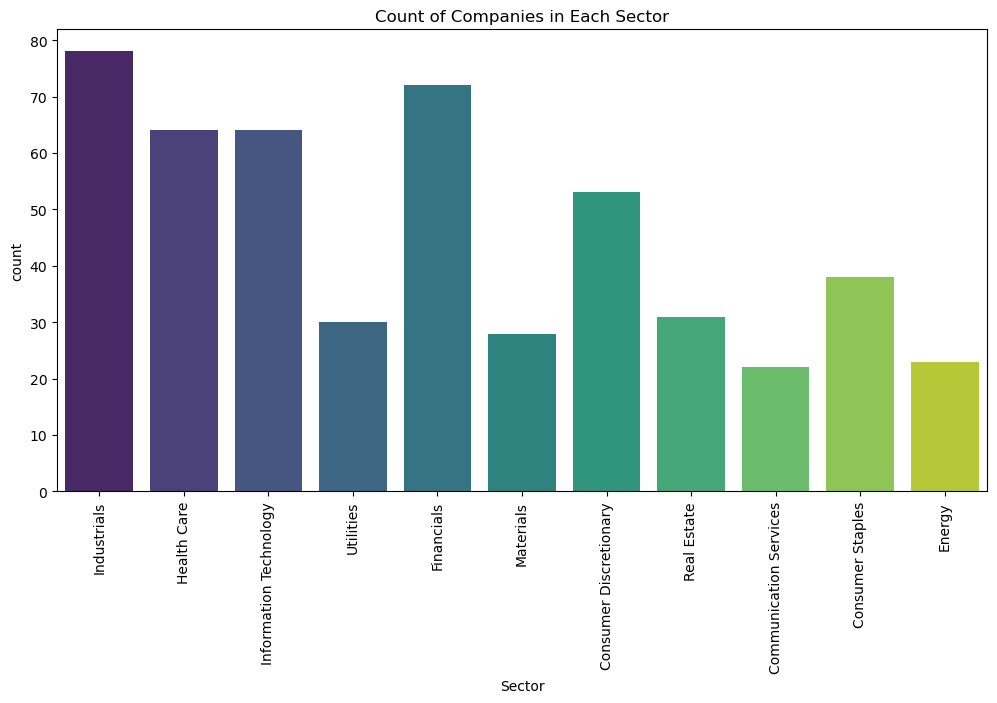

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sector', data=df, palette='viridis')
plt.title('Count of Companies in Each Sector')
plt.xticks(rotation=90)
plt.show()

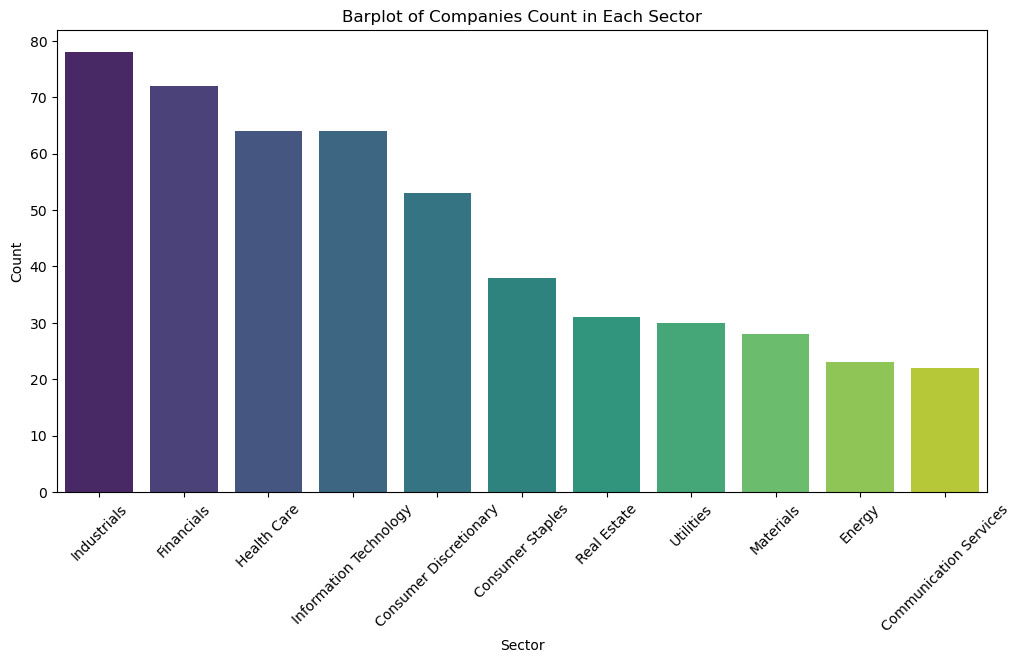

In [34]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Sector'].value_counts().index, y=df['Sector'].value_counts(), palette='viridis')
plt.title('Barplot of Companies Count in Each Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

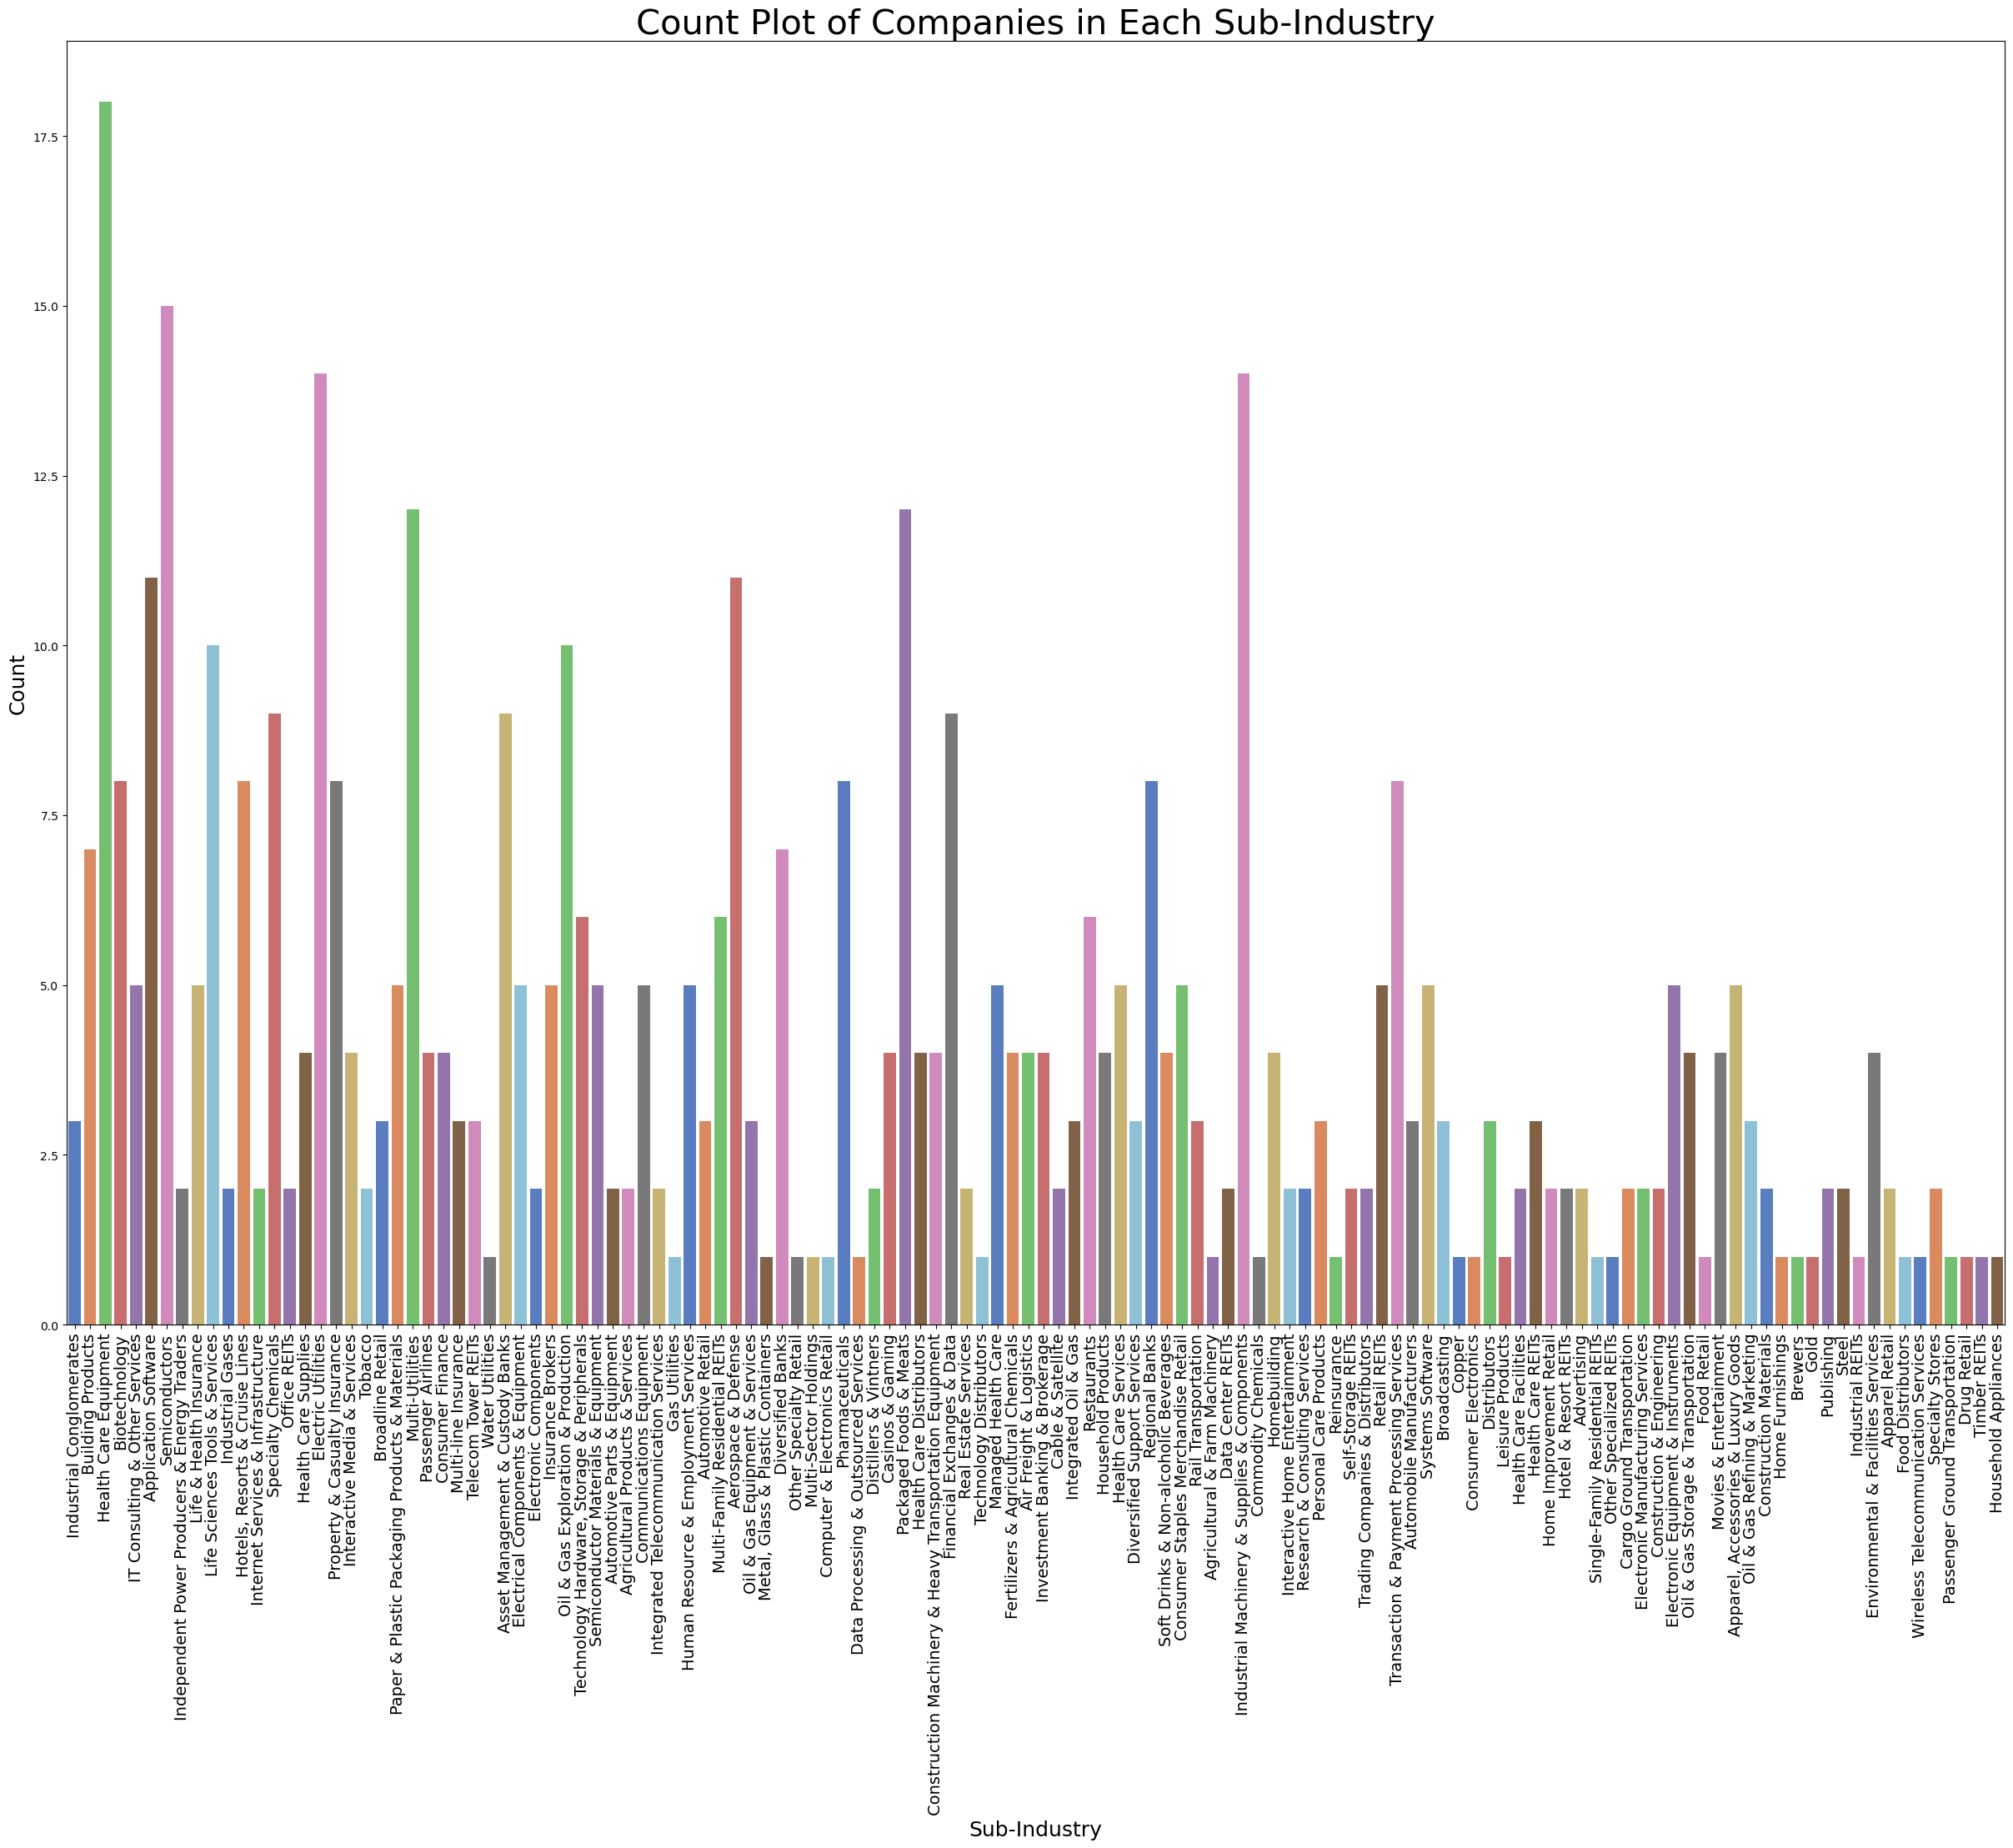

In [35]:
plt.figure(figsize=(30, 20))
sns.countplot(x='SubIndustry', data=df, palette='muted')
plt.title('Count Plot of Companies in Each Sub-Industry',fontsize=30)
plt.xlabel('Sub-Industry',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.xticks(fontsize=14,rotation=90)
plt.show()

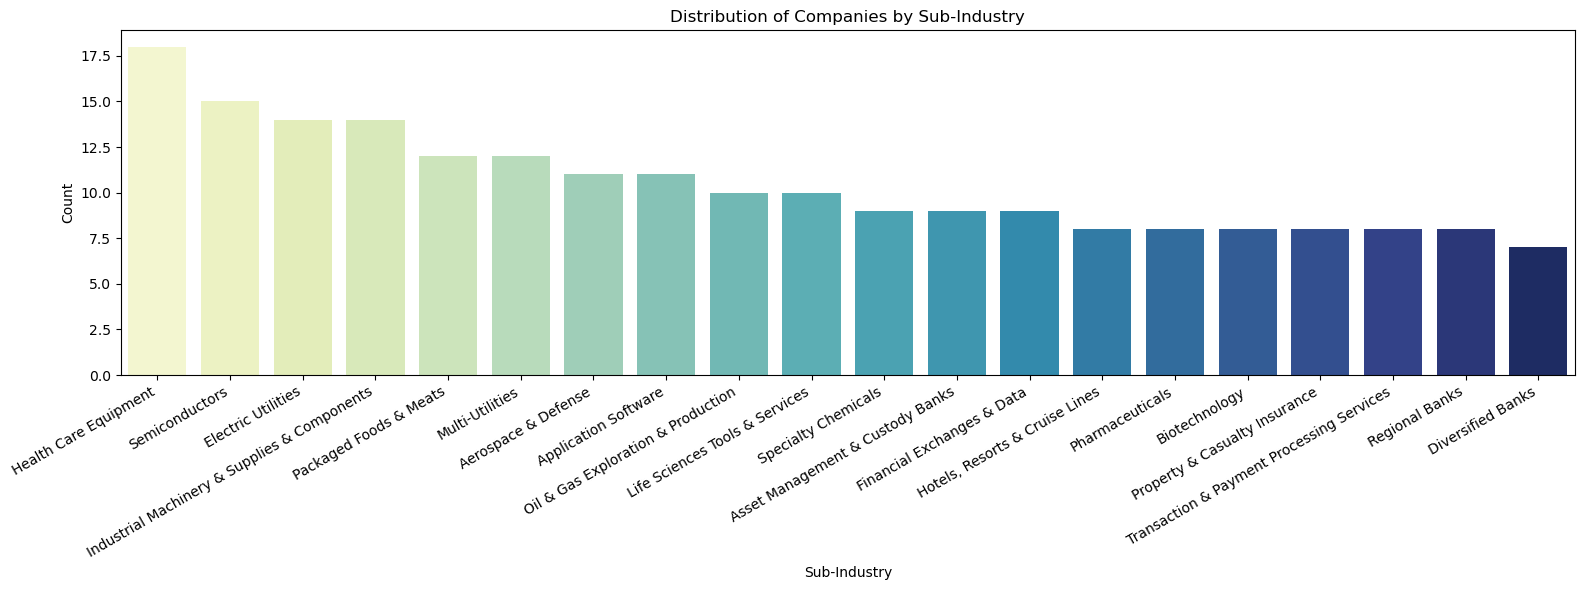

In [36]:
# Explore Sub-Industry distribution
plt.figure(figsize=(16, 6))
subindustry_counts = df['SubIndustry'].value_counts().head(20)  # Assuming 20 as an example
sns.countplot(x='SubIndustry', data=df, palette='YlGnBu', order=subindustry_counts.index)
plt.title('Distribution of Companies by Sub-Industry')
plt.xlabel('Sub-Industry')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

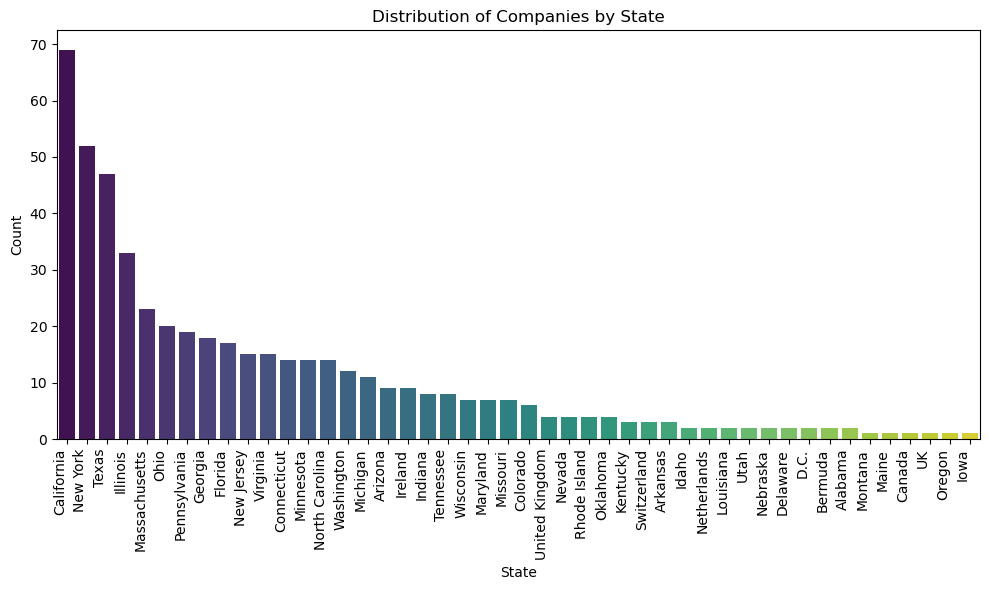

In [37]:
# Explore State distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=df, palette='viridis', order=df['State'].value_counts().index)
plt.title('Distribution of Companies by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

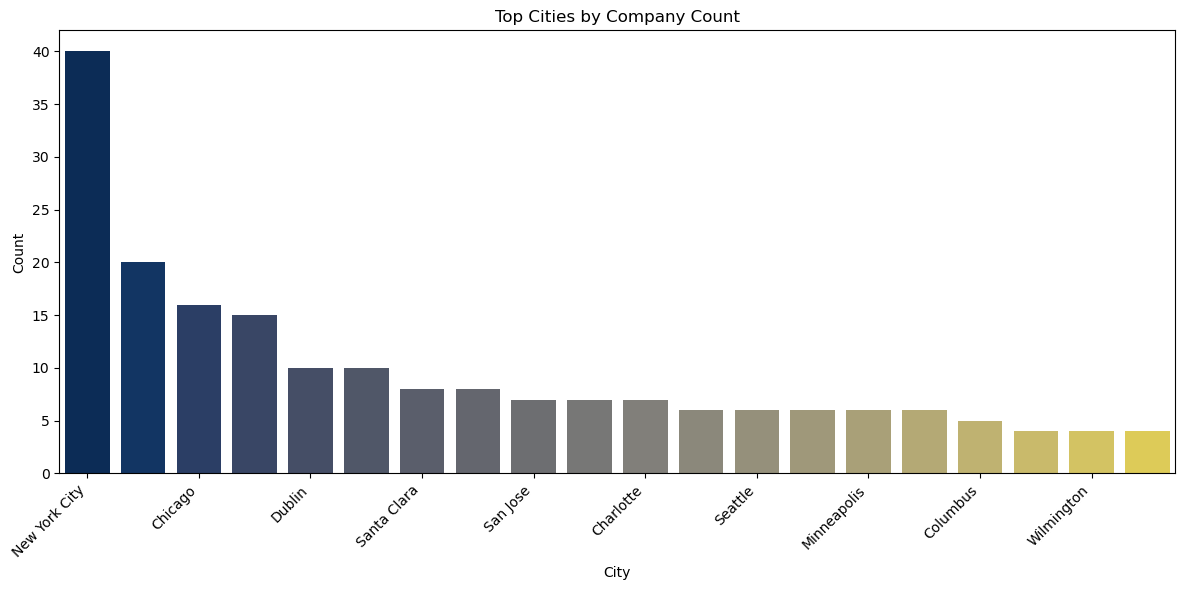

In [38]:
# Explore City distribution
plt.figure(figsize=(12, 6))
city_counts = df['City'].value_counts().head(20)  # Assuming 20 as an example
sns.countplot(x='City', data=df, palette='cividis', order=city_counts.index)
plt.title('Top Cities by Company Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.xticks(range(0, len(city_counts.index), 2), city_counts.index[::2])
plt.tight_layout()
plt.show()

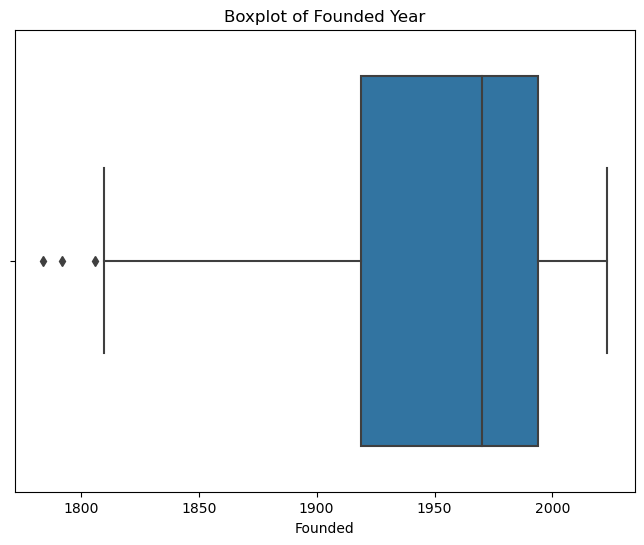

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Founded'])
plt.title('Boxplot of Founded Year')
plt.show()

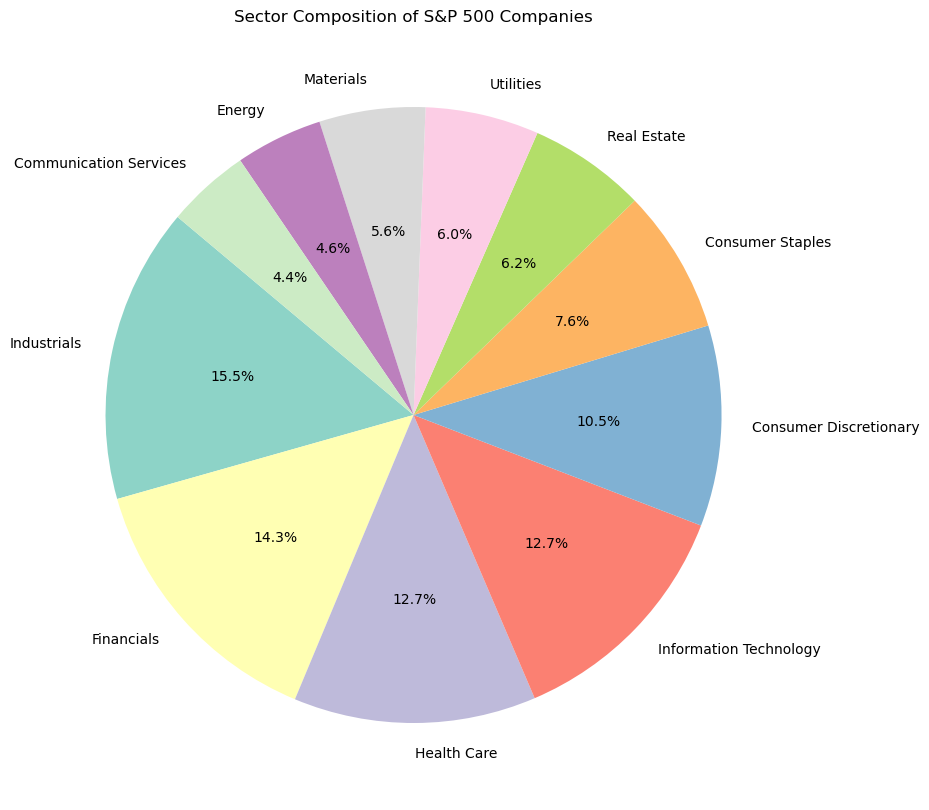

In [40]:
#Pie Chart of Sector Composition:

# Calculate the proportion of companies in each sector
sector_counts = df['Sector'].value_counts()

#pie chart
plt.figure(figsize=(10, 10))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Sector Composition of S&P 500 Companies')
plt.show()

## Bivariate analysis

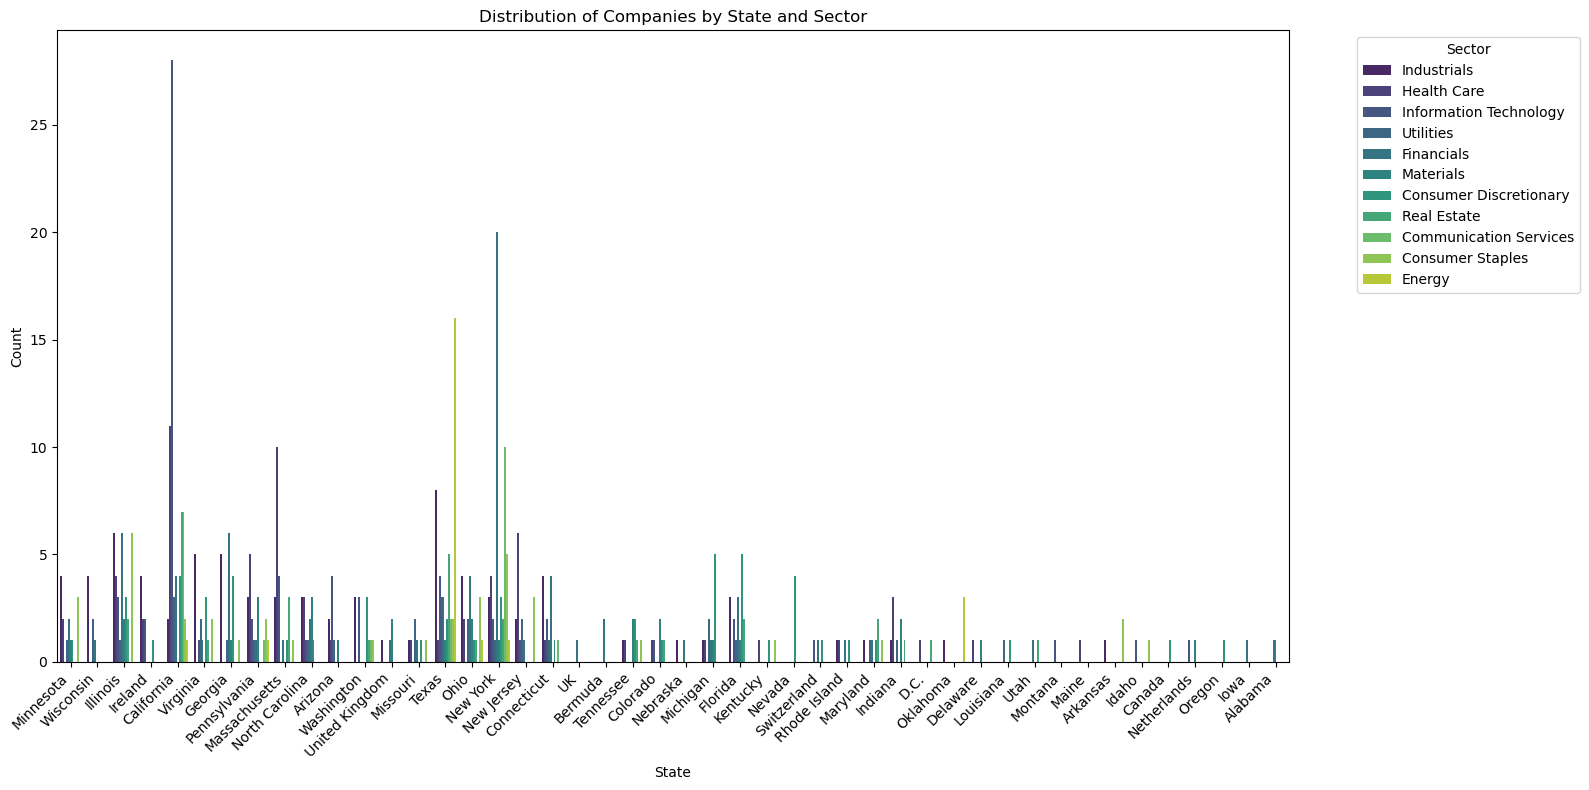

In [41]:
# Explore the relationship between State and Sector
plt.figure(figsize=(16, 8))
sns.countplot(x='State', hue='Sector', data=df, palette='viridis')
plt.title('Distribution of Companies by State and Sector')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


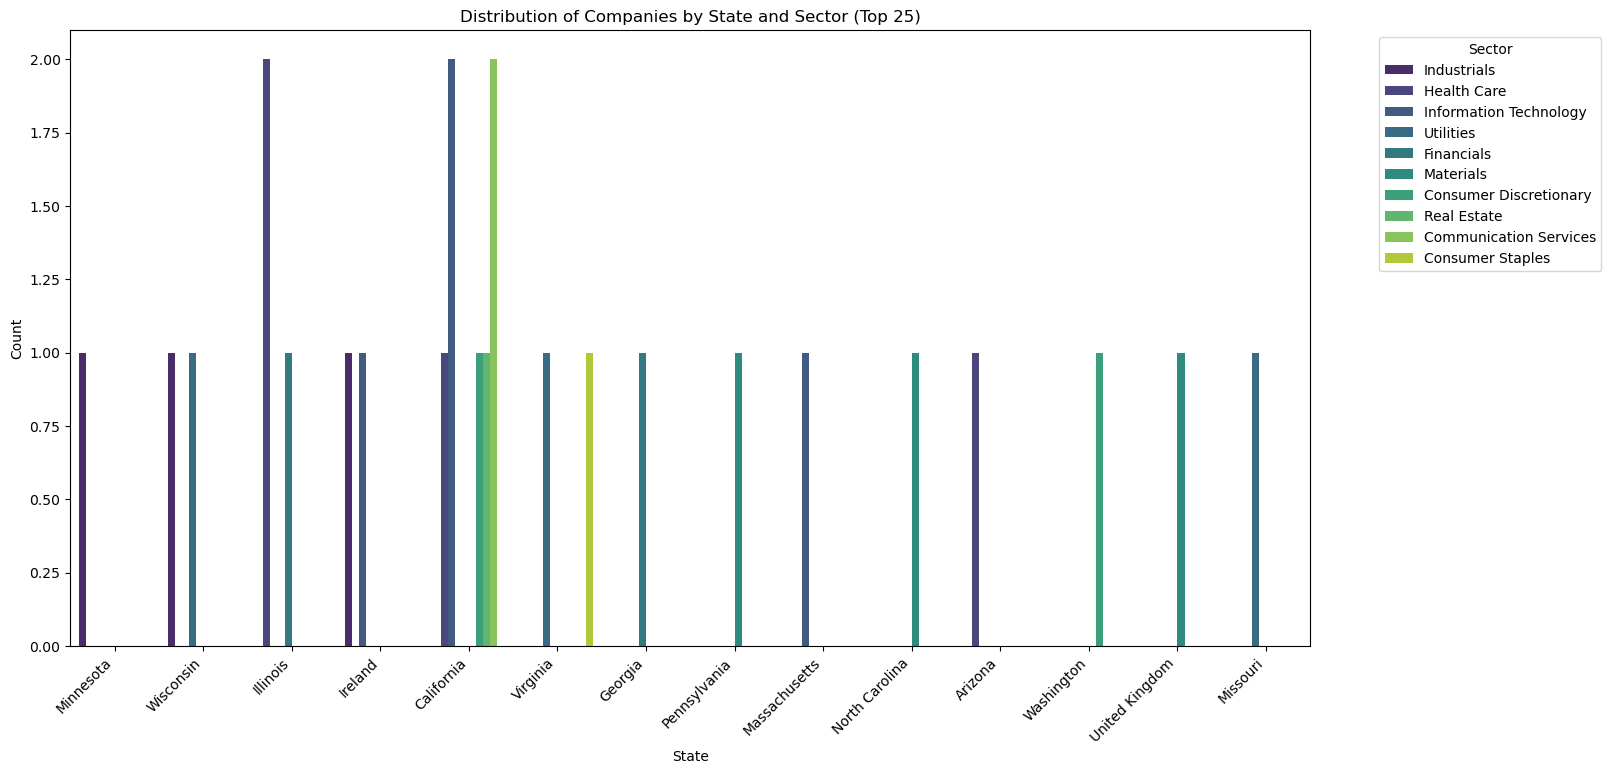

In [42]:
df_top25 = df.head(25)

# Explore the relationship between State and Sector for the top 25 rows
plt.figure(figsize=(16, 8))
sns.countplot(x='State', hue='Sector', data=df_top25, palette='viridis')
plt.title('Distribution of Companies by State and Sector (Top 25)')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')

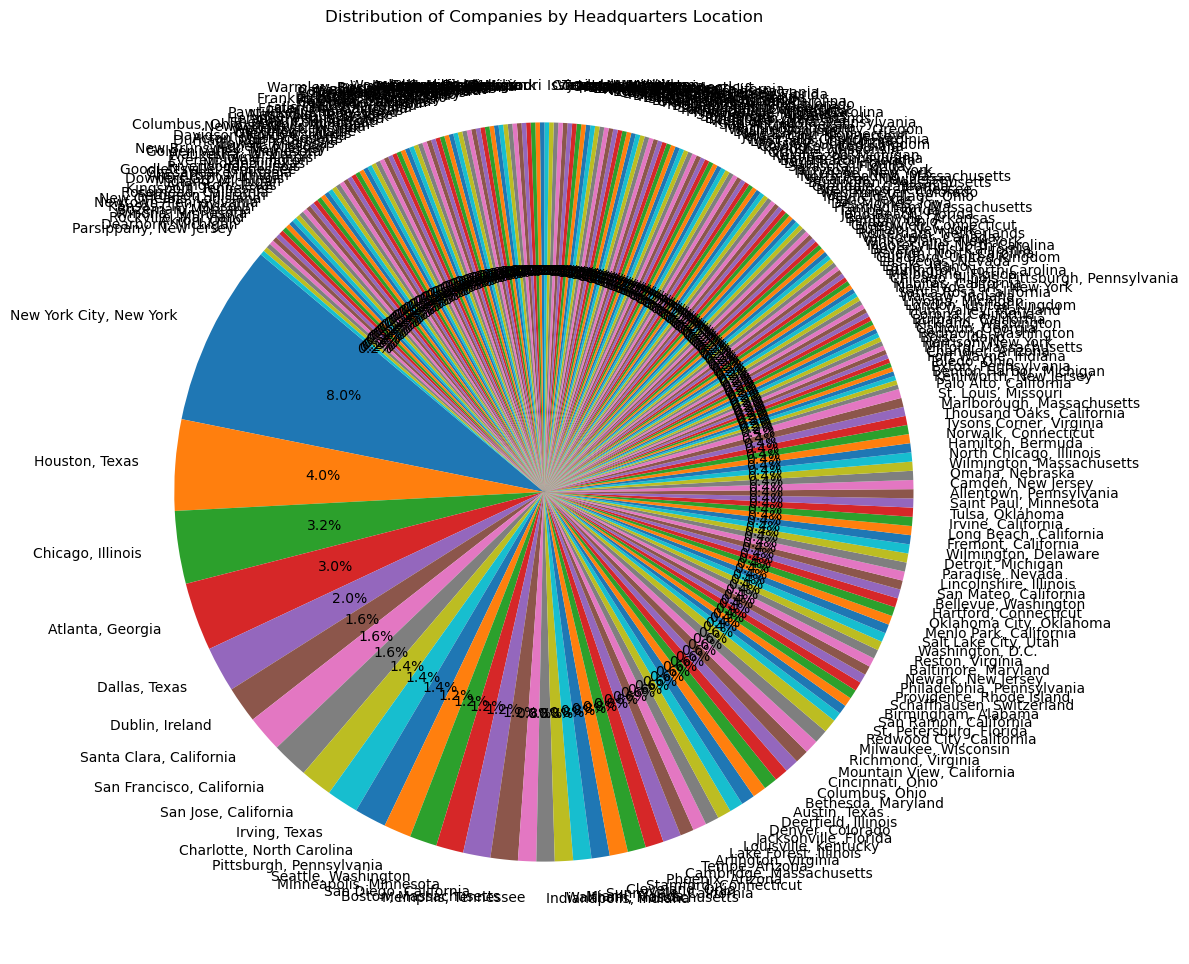

In [43]:
headquarters_counts = df['Headquarters'].value_counts()
plt.figure(figsize=(12, 12))
plt.pie(headquarters_counts, labels=headquarters_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Companies by Headquarters Location')
plt.show()

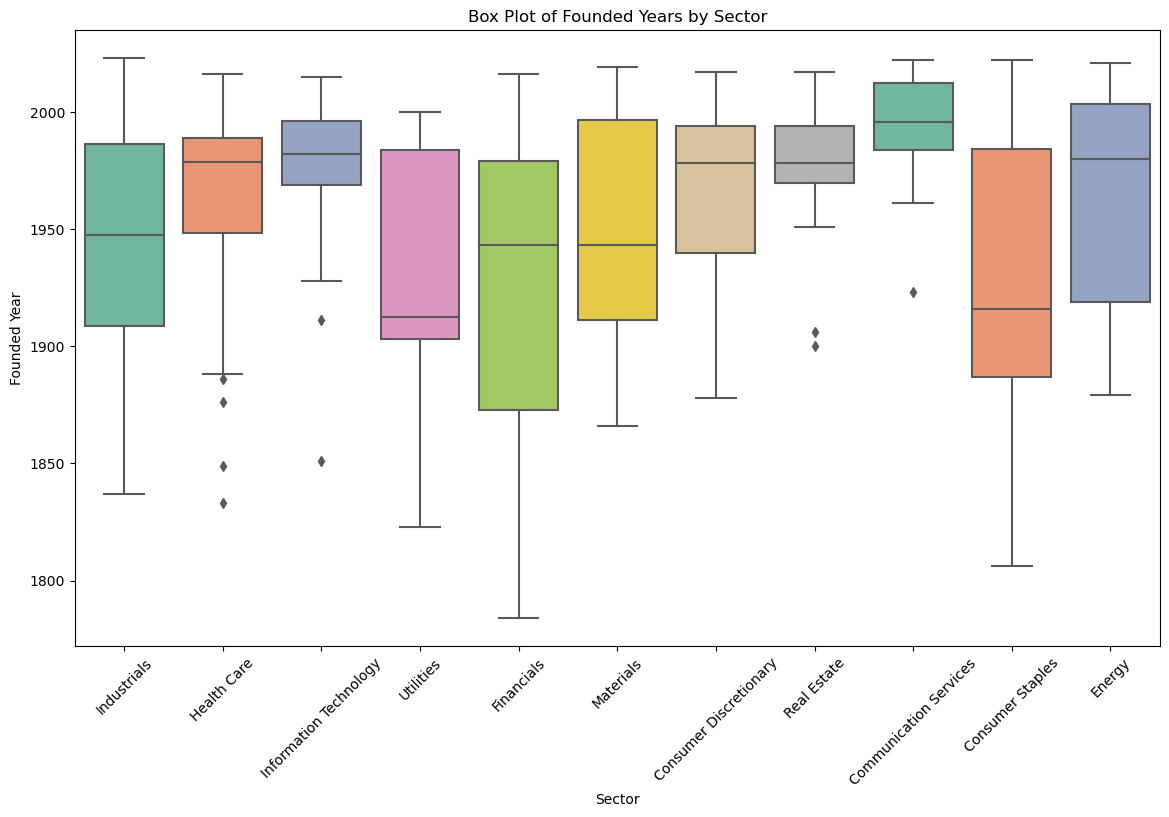

In [44]:
#Box plot of Founded Years by Sector
plt.figure(figsize=(14, 8))
sns.boxplot(x='Sector', y='Founded', data=df, palette='Set2')
plt.title('Box Plot of Founded Years by Sector')
plt.xlabel('Sector')
plt.ylabel('Founded Year')
plt.xticks(rotation=45)
plt.show()

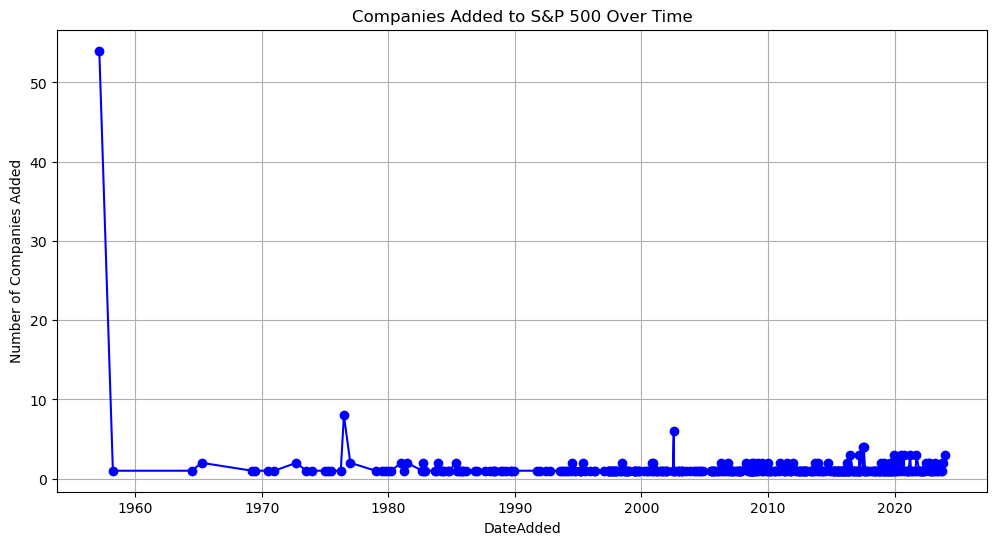

In [45]:
df['DateAdded'] = pd.to_datetime(df['DateAdded'])

# Group by 'Date Added',count the number of companies added on each date
companies_added_over_time = df['DateAdded'].value_counts().sort_index()

#time series plot
plt.figure(figsize=(12, 6))
plt.plot(companies_added_over_time.index, companies_added_over_time.values, marker='o', linestyle='-', color='blue')
plt.title('Companies Added to S&P 500 Over Time')
plt.xlabel('DateAdded')
plt.ylabel('Number of Companies Added')
plt.grid(True)
plt.show()

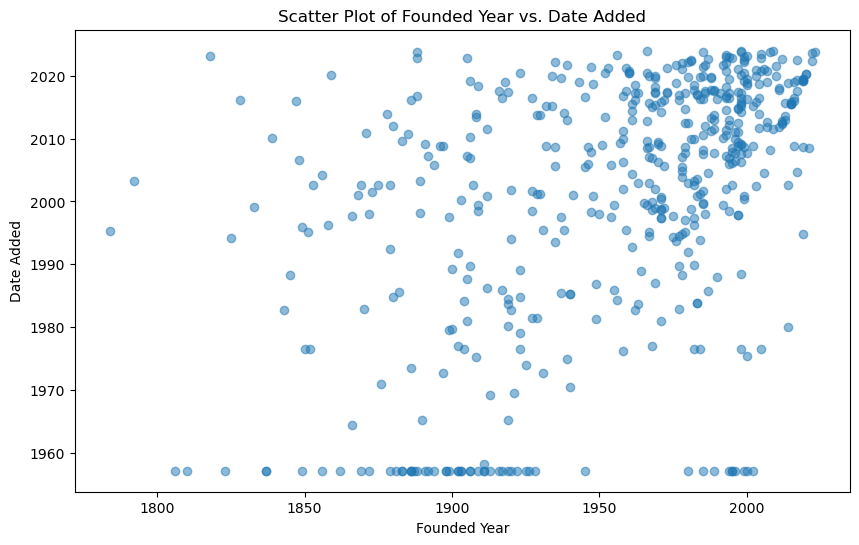

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Founded'], df['DateAdded'], alpha=0.5)
plt.title('Scatter Plot of Founded Year vs. Date Added')
plt.xlabel('Founded Year')
plt.ylabel('Date Added')
plt.show()

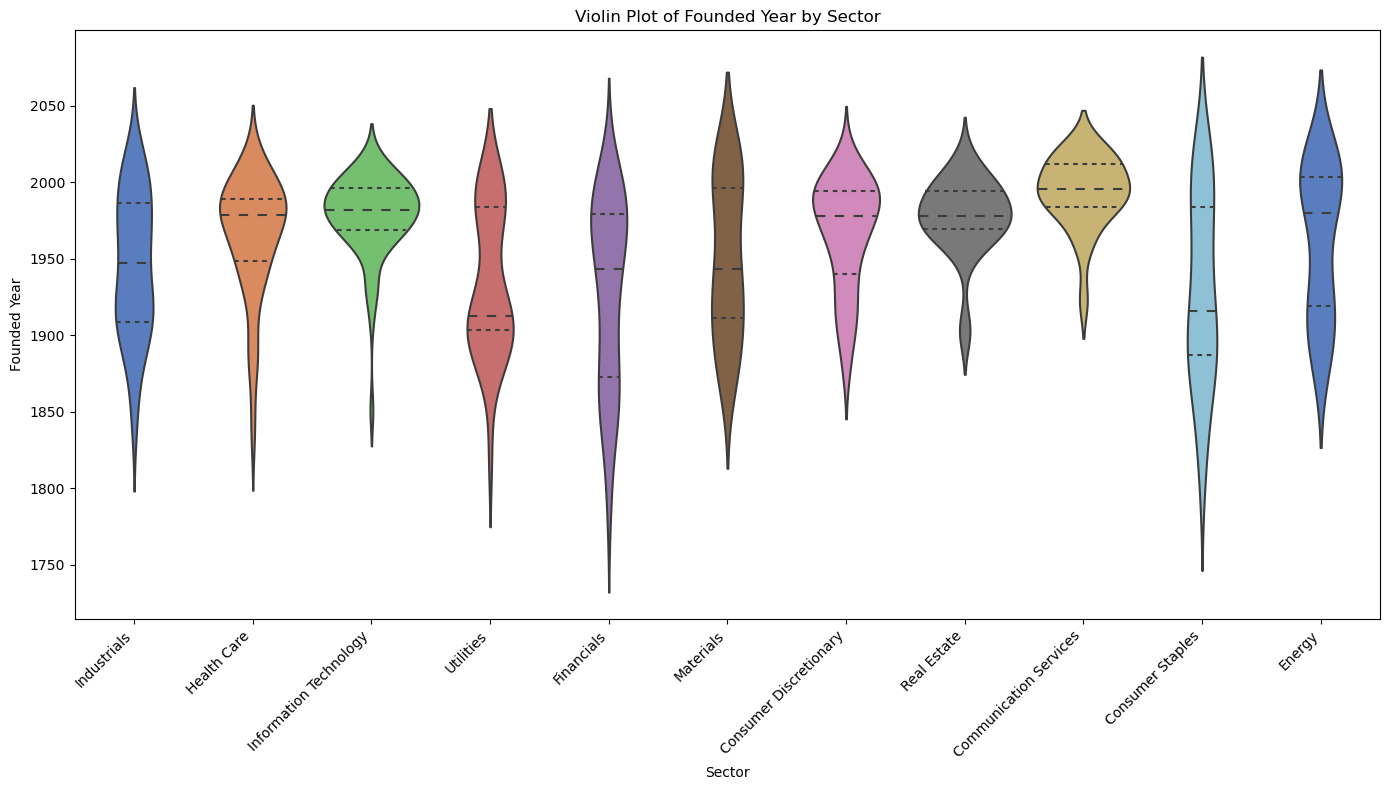

In [47]:
#Violin plot for Founded across different sectors
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sector', y='Founded', data=df, palette='muted', inner='quartile')
plt.title('Violin Plot of Founded Year by Sector')
plt.xlabel('Sector')
plt.ylabel('Founded Year')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

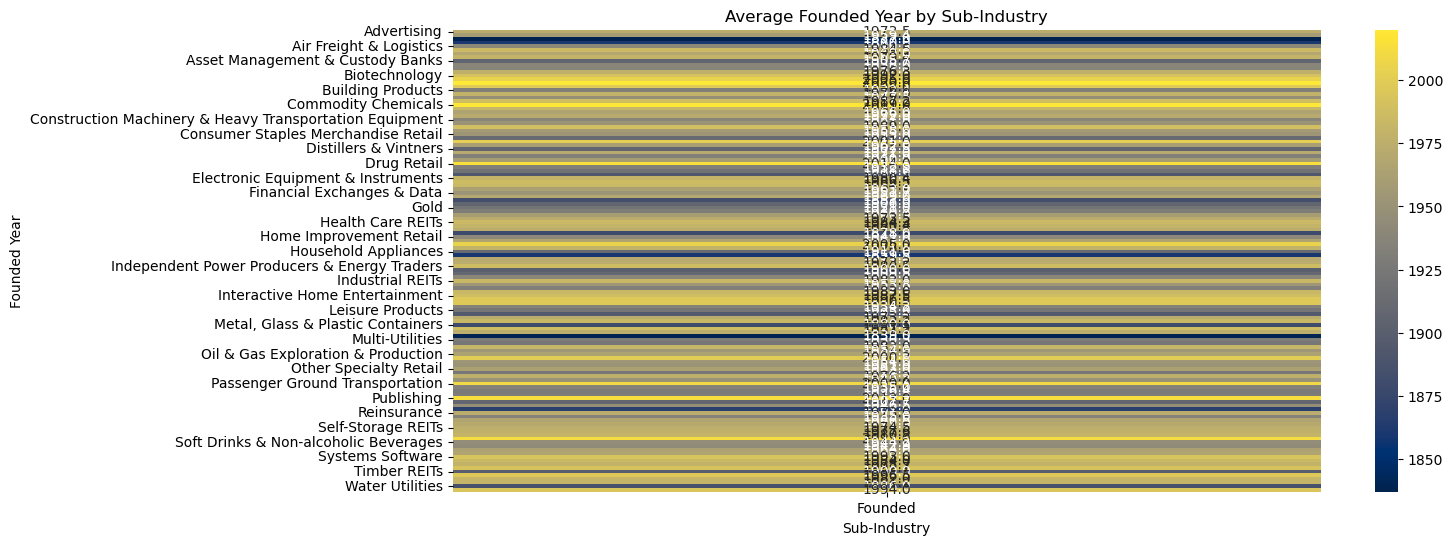

In [48]:
# Pivot Table
pivot_subindustry_founded = df.pivot_table(index='SubIndustry', values='Founded', aggfunc='mean')

# Plotting
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_subindustry_founded, cmap='cividis', annot=True, fmt=".1f")
plt.title('Average Founded Year by Sub-Industry')
plt.xlabel('Sub-Industry')
plt.ylabel('Founded Year')
plt.show()